# Proyek Analisis Data: Bike Sharing 
- **Nama:** Walker Valentinus Simanjuntak
- **Email:** iss21012@students.del.ac.id
- **ID Dicoding:** walkersimanjuntak

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana Distribusi rental sepeda per harinya?
- Pertanyaan 2: Pada cuaca seperti apa sepeda paling banyak dirental?
- Pertanyaan 3: Bagaimana trend line rental sepeda setiap bulan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('Data/day.csv')
hour_df = pd.read_csv('Data/hour.csv')

### Assessing Data

In [3]:
pd.set_option('display.max_columns', None) 
def data_overview(day_df, head=5):
    print(" SHAPE ".center(4, '-'))
    print('Rows:{}'.format(day_df.shape[0]))
    print('Columns:{}'.format(day_df.shape[1]))
    print("\n")
    print(" MISSING VALUES ".center(4, '-'))
    print(day_df.isnull().sum())
    print("\n")
    print(" DUPLICATED VALUES ".center(4, '-'))
    print(day_df.duplicated().sum())
    print("\n")
    print(" HEAD ".center(4, '-'))
    print(day_df.head(3))
    print("\n")
    print(" DATA TYPES ".center(4, '-'))
    print(day_df.dtypes)
    print("\n")
    print("DATA DAY SUMMARRY".center(4, '-'))
    print(day_df.describe())

data_overview(day_df)

 SHAPE 
Rows:731
Columns:16


 MISSING VALUES 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


 DUPLICATED VALUES 
0


 HEAD 
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   

    cnt  
0   985  
1   801  
2  1349  



In [4]:
pd.set_option('display.max_columns', None) 
def data_overview(hour_df, head=5):
    print(" SHAPE ".center(4, '-'))
    print('Rows:{}'.format(hour_df.shape[0]))
    print('Columns:{}'.format(hour_df.shape[1]))
    print("\n")
    print(" MISSING VALUES ".center(4, '-'))
    print(hour_df.isnull().sum())
    print("\n")
    print(" DUPLICATED VALUES ".center(4, '-'))
    print(hour_df.duplicated().sum())
    print("\n")
    print(" HEAD ".center(4, '-'))
    print(hour_df.head(3))
    print("\n")
    print(" DATA TYPES ".center(4, '-'))
    print(hour_df.dtypes)
    print("\n")
    print("DATA HOUR SUMMARRY".center(4, '-'))
    print(hour_df.describe())

data_overview(hour_df)

 SHAPE 
Rows:17379
Columns:17


 MISSING VALUES 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


 DUPLICATED VALUES 
0


 HEAD 
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  


 DATA TYPES 
instant         i

### Cleaning Data

#### Because there is no missing value or duplicated data, we check the outlier

In [5]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = hour_df[(hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound)]
# outliers.style.background_gradient(cmap='BrBG')

outliers.shape

(505, 17)

In [19]:
# Delete Outlier
cleaned_outliers = hour_df[~((hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound))]
hour_df_cleaned = cleaned_outliers.copy()

hour_df_cleaned.shape

(16874, 17)

#### Convert Dteday to datetime

In [7]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df_cleaned['dteday'] = pd.to_datetime(hour_df_cleaned['dteday'])

#### Changing Weathersit to Sunny(1), Cloudy(2), Light Rain(3), and Rainy(4)

In [8]:
weather_mapping = {
    1: 'Sunny',
    2: 'Cloudy',
    3: 'Light Rain',
    4: 'Rainy'
}

hour_df_cleaned['weathersit'] = hour_df_cleaned['weathersit'].replace(weather_mapping)

#### Changing yr value to 2011(0), 2012(1)

In [9]:
year_mapping = {
    0: '2011',
    1: '2012'
}

hour_df_cleaned['yr'] = hour_df_cleaned['yr'].replace(year_mapping)

## Exploratory Data Analysis (EDA)

### Explore Dataset

Text(0.5, 1.0, 'Distribution of bike rentals per day')

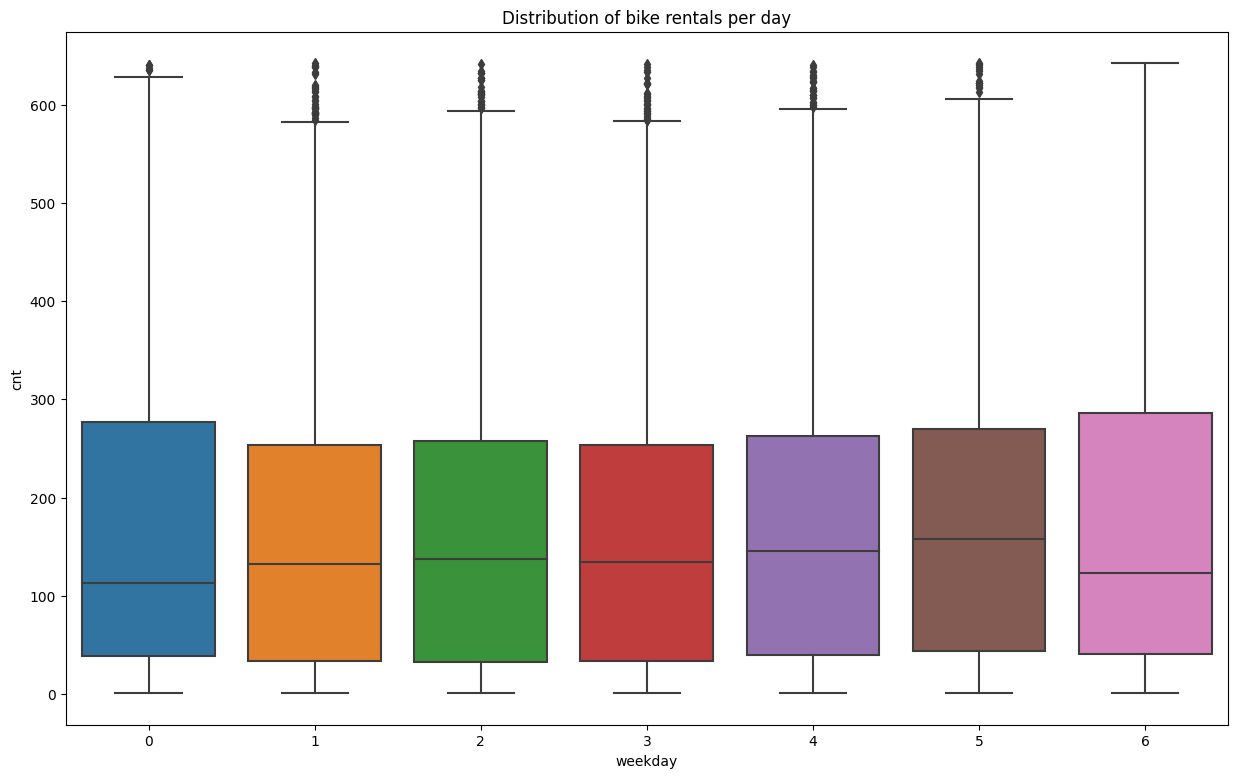

In [10]:
# Distribution of bike rentals per day

plt.figure(figsize=(15, 9))
ax = sns.boxplot(x='weekday', y='cnt', data=hour_df_cleaned)
plt.title('Distribution of bike rentals per day')

Text(0.5, 1.0, 'Distribution of bike rentals per month')

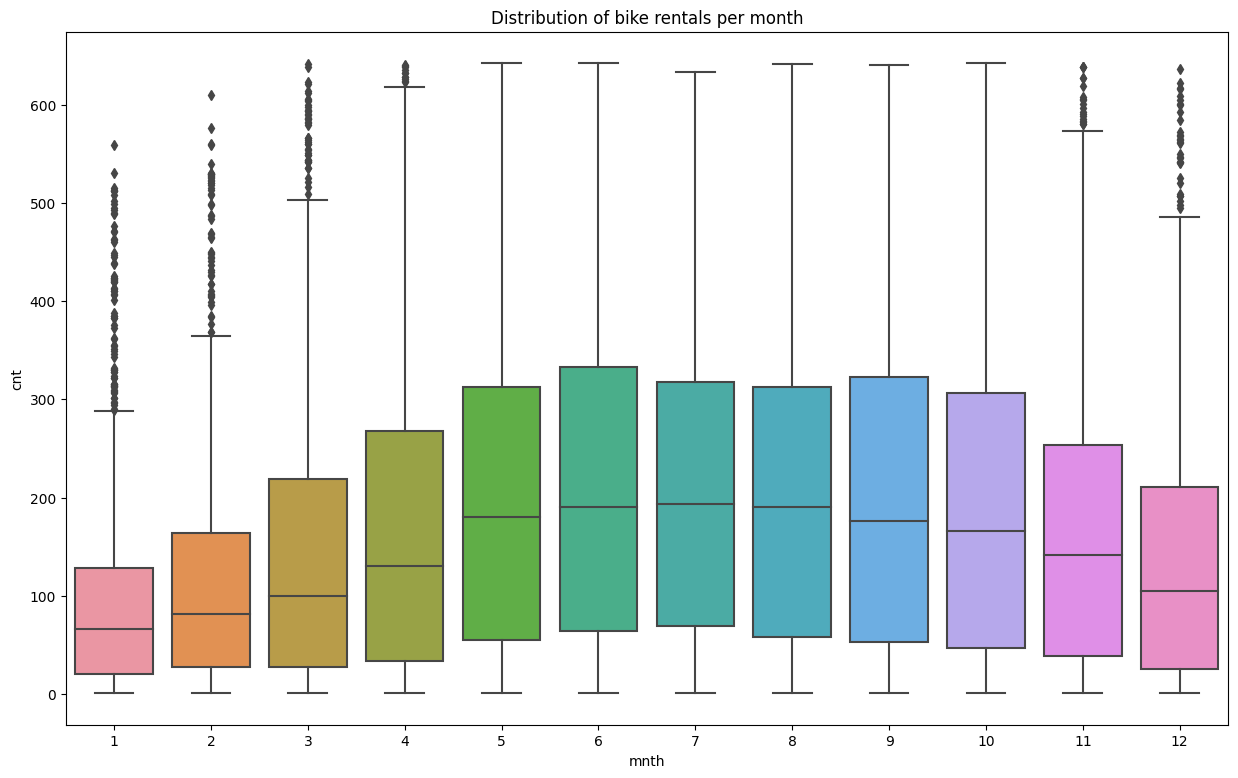

In [11]:
# Distribution of bike rentals per month

plt.figure(figsize=(15, 9))
ax = sns.boxplot(x='mnth', y='cnt', data=hour_df_cleaned)
plt.title('Distribution of bike rentals per month')

Text(0.5, 1.0, 'Distribution of bike rentals per year')

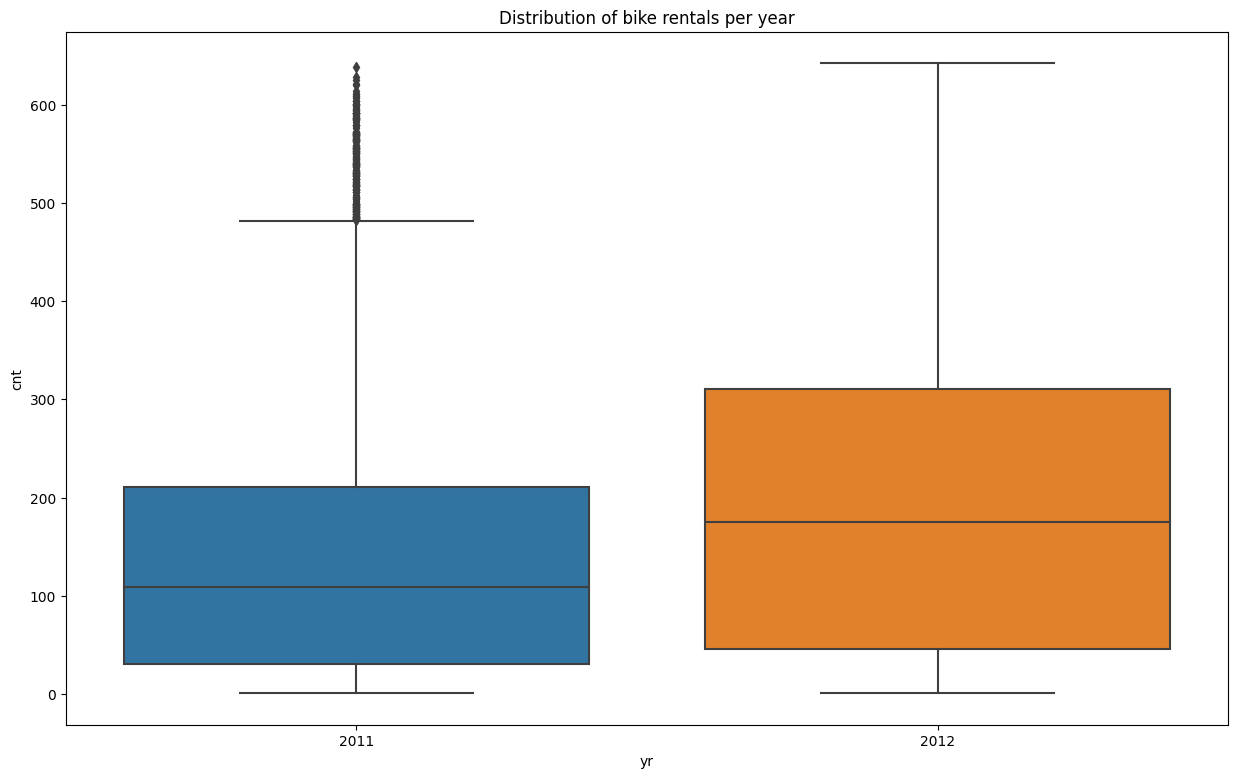

In [12]:
# Distribution of bike rentals per year

plt.figure(figsize=(15, 9))
ax = sns.boxplot(x='yr', y='cnt', data=hour_df_cleaned)
plt.title('Distribution of bike rentals per year')

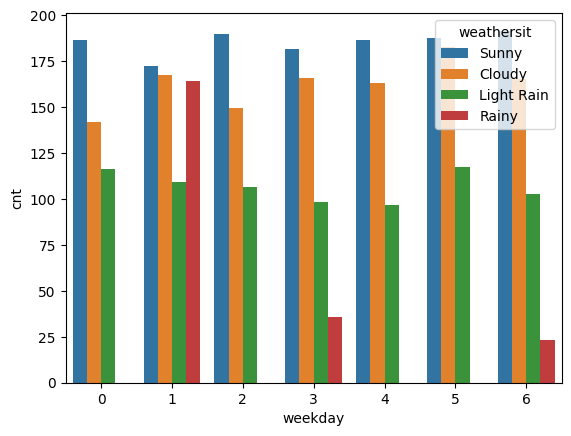

In [13]:
# Distribution of casually and registered rentals

sns.barplot(data=hour_df_cleaned, x="weekday", y="cnt", hue="weathersit", errorbar=None)
plt.show()

Text(0, 0.5, 'Count of Rentals')

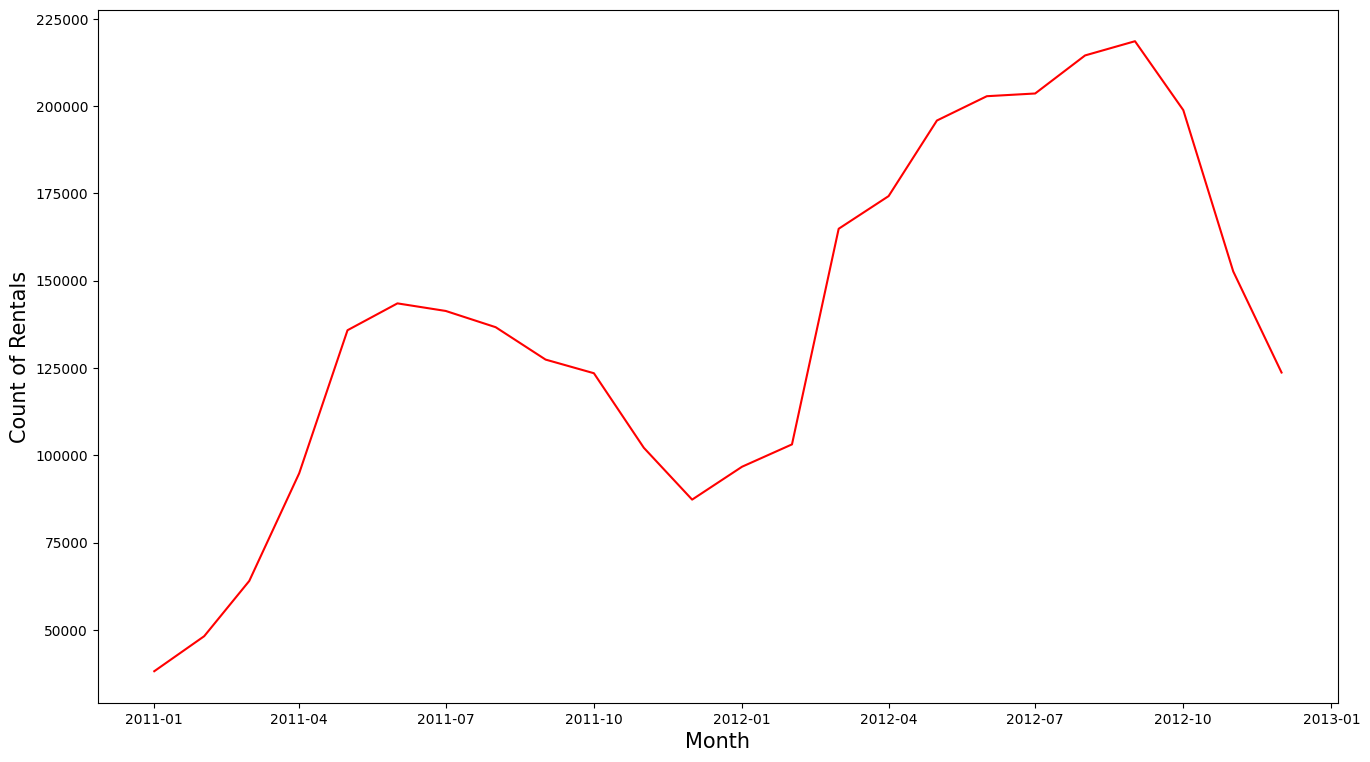

In [14]:
# Trend bike rentals per quarter
day_df['month'] = day_df['dteday'].dt.to_period('M')

monthly_rentals = day_df.groupby('month')['cnt'].sum().reset_index()

plt.figure(figsize=(16, 9))
plt.plot(monthly_rentals['month'].dt.to_timestamp(), monthly_rentals['cnt'], color='red')
plt.xlabel('Month', size=15)
plt.ylabel('Count of Rentals', size=15)

In [ ]:
hour_df_cleaned.to_csv("hour_df_cleaned.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Distribusi rental sepeda per harinya?

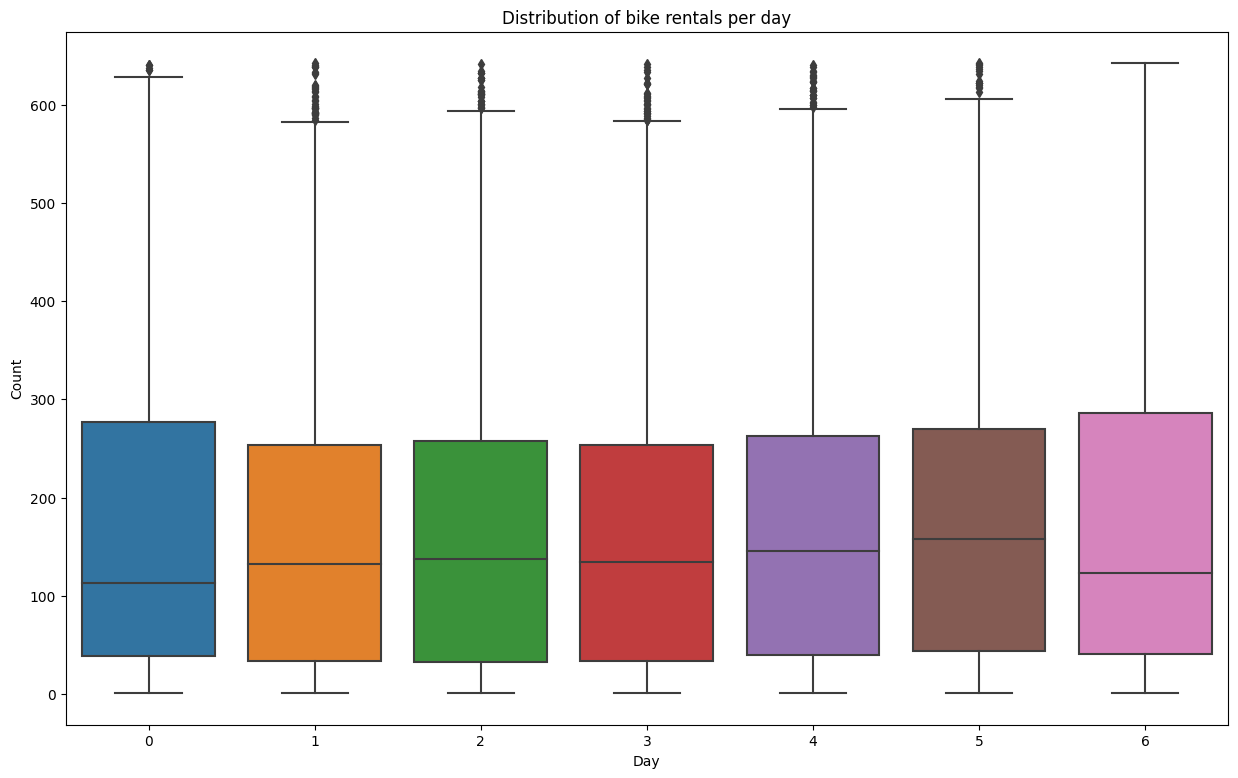

In [15]:
plt.figure(figsize=(15, 9))
ax = sns.boxplot(x='weekday', y='cnt', data=hour_df_cleaned)
plt.title('Distribution of bike rentals per day')
plt.xlabel('Day')
plt.ylabel('Count')

plt.show()

##### Explanatory 
###### Pada gambar dapat kita lihat distribusi peminjaman sepeda dari hari Minggu (0) sampai hari Sabtu (6). Dari visualisasi tersebut dapat kita simpulkan bahwa dataset cenderung miring ke kanan (positive skewness) ditandai dengan whisker atas yang lebih panjang dari whisker bawah

### Pertanyaan 2: Pada cuaca seperti apa sepeda paling banyak dirental?

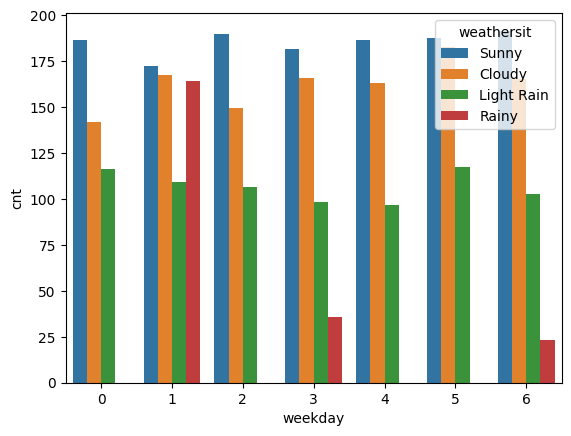

In [16]:
sns.barplot(data=hour_df_cleaned, x="weekday", y="cnt", hue="weathersit", errorbar=None)
plt.show()

##### Explanatory 
###### Pada gambar dapat kita lihat dari tiap week day Minggu sampai Sabtu, pada cuaca apa ornag paling sering merental sepeda. pada hari Senin (1), kita temukan hal menarik di mana untuk setiap cuaca pelanggan merental sepeda dengan jumlah yang cukup tinggi, mungkin hal ini ada pengaruhnya dengan hari pertama di minggu itu untuk masuk kerja. Kesimpulan lain yang kita dapat juga adalah cuaca Sunny merupakan cuaca yang paling banyak dilakukan perentalan.

### Pertanyaan 3: Bagaimana trend line rental sepeda setiap bulan?

Text(0, 0.5, 'Count of Rentals')

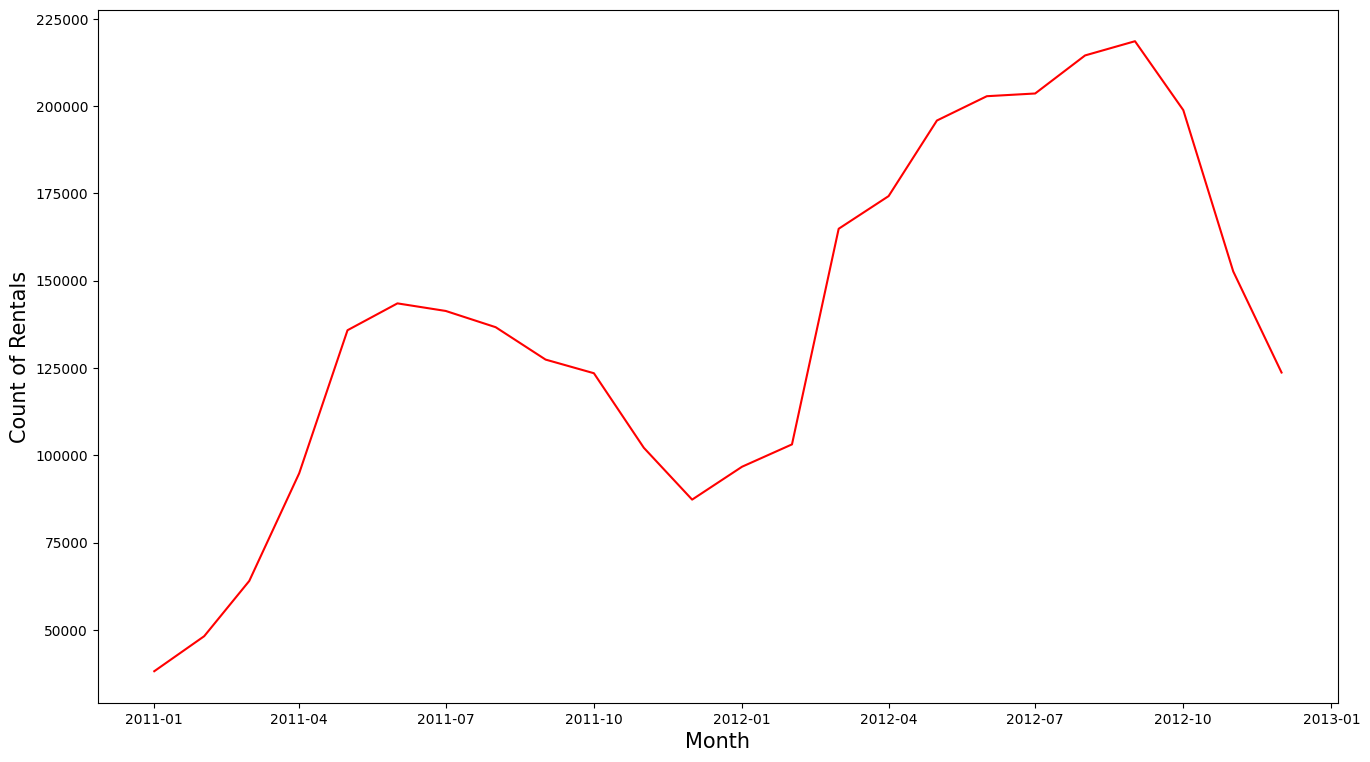

In [17]:
day_df['month'] = day_df['dteday'].dt.to_period('M')

monthly_rentals = day_df.groupby('month')['cnt'].sum().reset_index()

plt.figure(figsize=(16, 9))
plt.plot(monthly_rentals['month'].dt.to_timestamp(), monthly_rentals['cnt'], color='red')
plt.xlabel('Month', size=15)
plt.ylabel('Count of Rentals', size=15)

##### Explanatory 
###### Pada gambar dapat kita lihat bagaimana trend line dari perentalan sepeda setiap bulan dari 2011 sampai 2012. Pada awal 2011 perentalan masih sangat sedikit, namun naik dengan seiring berjalannya waktu. Puncak perentalan sepeda paling banyak ada di bulan September 2012.

## Conclusion

- Conclution pertanyaan 1
Data tidak simetris ditandai dengan whisker atas lebih panjang (Positive Skewness) dengan sebaran data yang luas.
- Conclution pertanyaan 2
Cuaca Sunny (Cerah) merupakan cuaca dengan jumlah perentalan paling banyak setiap harinya.
- Conclution pertanyaan 3
Rental sepeda memliki trend line yang baik pada Q2 dan Q3 untuk tahun 2011 dan 2012